In [1]:
import numpy
import scipy
import seaborn
import pandas
import struct
import matplotlib.pyplot as plt
%matplotlib ipympl

In [2]:
plt.close()

In [3]:
data_path = "data/"

# load signal and peak positions 

with open(data_path + 'signal.npy', 'rb') as f:
    signal = numpy.load(f)
with open(data_path + 'peaks.npy', 'rb') as f:
    peaks = numpy.load(f)

In [4]:
# convert from sample number to time

fs = 50 * 1e6   # 50 MHz
peaks_s = numpy.divide(peaks, fs)
peaks_ms = numpy.multiply(peaks_s, 1e3) #to us

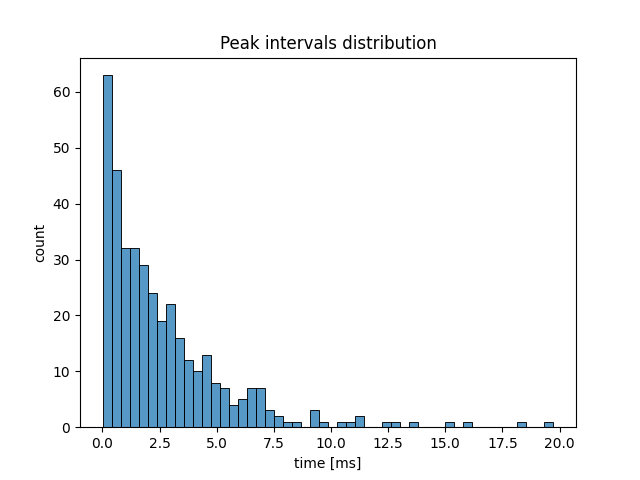

In [5]:
# rozkład odstępów 

diffs = peaks_ms[1:] - peaks_ms[:-1]

fig, ax = plt.subplots()
seaborn.histplot(diffs, kde=False, bins=50)
plt.xlabel("time [ms]")
plt.ylabel("count")
plt.title("Peak intervals distribution")
plt.show()